In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [ ]:
# load data
training1=pd.read_csv('/content/drive/My Drive/FML_Assignment/training1.csv')
training2=pd.read_csv('/content/drive/My Drive/FML_Assignment/training2.csv')

In [ ]:
dups = data.duplicated()
# identify that contain duplicate observations.
print(dups.any())
print(data[dups])
print('____________')
# identify column variables that only have a single value.
counts = data.nunique()
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

False
Empty DataFrame
Columns: [CNNs, CNNs.1, CNNs.2, CNNs.3, CNNs.4, CNNs.5, CNNs.6, CNNs.7, CNNs.8, CNNs.9, CNNs.10, CNNs.11, CNNs.12, CNNs.13, CNNs.14, CNNs.15, CNNs.16, CNNs.17, CNNs.18, CNNs.19, CNNs.20, CNNs.21, CNNs.22, CNNs.23, CNNs.24, CNNs.25, CNNs.26, CNNs.27, CNNs.28, CNNs.29, CNNs.30, CNNs.31, CNNs.32, CNNs.33, CNNs.34, CNNs.35, CNNs.36, CNNs.37, CNNs.38, CNNs.39, CNNs.40, CNNs.41, CNNs.42, CNNs.43, CNNs.44, CNNs.45, CNNs.46, CNNs.47, CNNs.48, CNNs.49, CNNs.50, CNNs.51, CNNs.52, CNNs.53, CNNs.54, CNNs.55, CNNs.56, CNNs.57, CNNs.58, CNNs.59, CNNs.60, CNNs.61, CNNs.62, CNNs.63, CNNs.64, CNNs.65, CNNs.66, CNNs.67, CNNs.68, CNNs.69, CNNs.70, CNNs.71, CNNs.72, CNNs.73, CNNs.74, CNNs.75, CNNs.76, CNNs.77, CNNs.78, CNNs.79, CNNs.80, CNNs.81, CNNs.82, CNNs.83, CNNs.84, CNNs.85, CNNs.86, CNNs.87, CNNs.88, CNNs.89, CNNs.90, CNNs.91, CNNs.92, CNNs.93, CNNs.94, CNNs.95, CNNs.96, CNNs.97, CNNs.98, CNNs.99, ...]
Index: []

[0 rows x 4610 columns]
____________
[]


In [ ]:
data=training2

# drop the low confidence data
data.drop(data.loc[data['confidence']==0.66].index, inplace=True)
data

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,CNNs.10,CNNs.11,CNNs.12,CNNs.13,CNNs.14,CNNs.15,CNNs.16,CNNs.17,CNNs.18,CNNs.19,CNNs.20,CNNs.21,CNNs.22,CNNs.23,CNNs.24,CNNs.25,CNNs.26,CNNs.27,CNNs.28,CNNs.29,CNNs.30,CNNs.31,CNNs.32,CNNs.33,CNNs.34,CNNs.35,CNNs.36,CNNs.37,CNNs.38,CNNs.39,...,GIST.474,GIST.475,GIST.476,GIST.477,GIST.478,GIST.479,GIST.480,GIST.481,GIST.482,GIST.483,GIST.484,GIST.485,GIST.486,GIST.487,GIST.488,GIST.489,GIST.490,GIST.491,GIST.492,GIST.493,GIST.494,GIST.495,GIST.496,GIST.497,GIST.498,GIST.499,GIST.500,GIST.501,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
14,0.00000,0.00000,NaN,NaN,0.00000,1.5151,0.00000,0.46469,0.89557,0.00000,NaN,0.41339,0.00000,0.00000,1.177400,0.0,0.34667,0.22934,NaN,0.00000,0.00000,0.00000,NaN,NaN,0.00000,0.61443,0.62352,0.0,NaN,0.00000,0.043887,0.000,NaN,0.092796,0.51648,0.66142,NaN,0.005754,NaN,0.00000,...,NaN,NaN,NaN,0.039100,NaN,0.017372,0.007980,0.025694,0.009572,NaN,0.005846,0.010710,0.016408,0.011204,0.001122,NaN,0.006253,0.018301,NaN,0.056184,0.061991,0.020518,0.007175,NaN,0.054380,0.016573,0.003284,NaN,0.011694,0.002099,0.012144,0.001809,0.008753,0.004012,NaN,0.013421,0.005070,0.036088,0.0,1.0
23,NaN,0.29005,0.377550,0.172170,0.00000,0.0000,0.00000,0.66253,1.30180,0.00000,0.00000,NaN,0.00000,NaN,1.823700,0.0,NaN,0.00000,1.1019,0.00000,0.00000,0.14064,0.000000,1.67840,0.00000,0.00000,1.04680,0.0,0.0000,0.00000,0.000000,0.000,NaN,0.306070,0.63127,0.89558,NaN,NaN,0.0000,NaN,...,0.020151,0.017083,0.010079,0.014837,0.014841,0.028490,0.011267,NaN,0.006051,0.009580,0.006189,0.015256,0.003178,NaN,0.004871,0.005753,0.039314,0.021291,0.001760,0.061693,0.022594,0.023751,0.012351,NaN,0.041376,0.008531,0.011940,NaN,0.018484,0.005399,0.007041,0.007484,0.012602,0.002727,0.015594,0.012372,0.009573,0.008190,1.0,1.0
28,0.98552,NaN,0.000000,0.000932,0.00000,NaN,NaN,0.00000,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.000000,NaN,0.00000,0.00000,0.0000,NaN,0.00000,0.00000,0.000000,NaN,0.00000,0.00000,0.00000,0.0,0.0000,0.00000,1.009100,0.000,NaN,0.000000,0.00000,NaN,0.0,0.000000,0.0000,2.15140,...,NaN,0.033568,0.006099,0.017287,NaN,0.058670,0.012437,0.033040,0.007975,0.007391,0.007200,NaN,0.015862,0.011259,0.007914,NaN,NaN,0.023108,NaN,0.040738,0.024548,0.050125,0.028176,0.029166,0.041450,0.010401,0.007129,NaN,0.017803,0.005348,0.005875,0.006137,0.009345,0.003796,0.038098,NaN,0.024351,NaN,0.0,1.0
36,0.34266,0.44640,0.000000,1.406500,NaN,0.0000,NaN,0.00000,0.00000,NaN,NaN,NaN,0.76886,0.00000,0.000000,0.0,0.00000,0.00000,0.0000,0.12262,NaN,0.00000,NaN,0.51334,0.00000,0.00000,0.68515,0.0,NaN,0.00000,0.000000,NaN,0.00000,0.000000,0.15730,NaN,0.0,0.000000,0.0000,0.00000,...,0.031969,0.024067,0.031279,0.040002,0.014832,0.027478,0.025730,0.028632,0.021095,NaN,0.017050,0.017578,NaN,0.059241,NaN,NaN,0.025195,0.099179,0.025167,0.033253,0.033032,0.025688,NaN,0.030170,0.025373,0.044848,NaN,0.030316,0.026394,0.021039,0.034658,0.047409,NaN,0.015142,NaN,0.022586,NaN,0.028349,1.0,1.0
42,0.00000,0.00000,0.000000,0.000000,0.98419,0.0000,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,0.62366,0.00000,0.000000,0.0,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.0,0.0000,0.00000,0.000000,NaN,NaN,0.000000,0.00000,0.00000,0.0,NaN,0.0000,0.00000,...,0.048117,0.059774,0.004919,0.010298,0.007150,0.018074,NaN,0.016881,0.007646,0.031194,0.032426,0.005368,0.018135,0.051592,NaN,0.022939,NaN,0.025380,0.014188,NaN,NaN,0.059960,0.049069,0.047452,0.053986,0.038580,0.004829,0.004814,0.037901,0.016311,0.003360,0.003254,0.035968,0.007106,0.053848,0.043616,0.045859,0.016011,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0.00000,

In [ ]:
# get data with label CNN and gist
properties = list(data.columns.values)
CNN_properties = [s for s in properties if "CNNs." in s]
CNN_data = data[CNN_properties]
GIST_properties = [s for s in properties if "GIST." in s]
GIST_data = data[GIST_properties]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
# calculate the importance of CNN feature
X_train, X_test, y_train, y_test = train_test_split(CNN_data, train_label, test_size=0.25, random_state=42)

ss = MinMaxScaler(feature_range = (0,1))

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
CNN_importances = statistics.mean(model.feature_importances_)

# calculate the importance of GIST feature
X_train, X_test, y_train, y_test = train_test_split(GIST_data, train_label, test_size=0.25, random_state=42)

ss = MinMaxScaler(feature_range = (0,1))

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
GIST_importances = statistics.mean(model.feature_importances_)

In [ ]:
print(CNN_importances)
print(GIST_importances)

0.00024420023
0.001956947


>mean 0.751 (0.041)
>median 0.749 (0.043)
>most_frequent 0.756 (0.043)
>constant 0.750 (0.046)


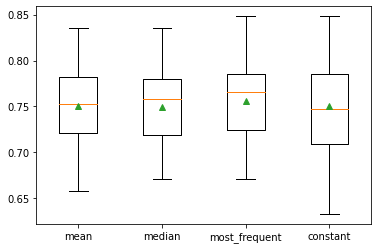

In [ ]:
# test appropriate imputing methods
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, pro_data, train_label, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [ ]:
# get the dataset
data_array=data.values
scaler = MinMaxScaler(feature_range = (0,1))
data_normalization = scaler.fit_transform(data_array)
imputer = SimpleImputer(strategy='mean')
data_imputing = imputer.fit_transform(data_normalization)

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,21):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, data_imputing, train_label)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>1 0.722 (0.038)
>2 0.732 (0.042)
>3 0.731 (0.042)
>4 0.755 (0.044)
>5 0.754 (0.043)
>6 0.758 (0.044)
>7 0.756 (0.047)
>8 0.759 (0.047)
>9 0.760 (0.046)
>10 0.762 (0.045)
>11 0.758 (0.049)
>12 0.757 (0.048)
>13 0.756 (0.045)
>14 0.757 (0.050)
>15 0.762 (0.047)
>16 0.759 (0.042)
>17 0.757 (0.044)
>18 0.758 (0.046)
>19 0.760 (0.048)
>20 0.756 (0.047)


In [ ]:
# Pre-processing data
def dataprocessing(data):

  # convert a dataframe into an array
  data_array=data.values
  # Input normalization: Normalization
  scaler = MinMaxScaler(feature_range = (0,1))
  data_normalization = scaler.fit_transform(data_array)

  # Imputing
  imputer = SimpleImputer(strategy='mean')
  data_imputing = imputer.fit_transform(data_normalization)
  
  # dimensionality reduction
  pca = PCA(n_components=10)
  data_pca = pca.fit_transform(data_imputing) 

  #draw plot
  plt.scatter(data_pca[:,0],data_pca[:,1])
  return data_pca


# evaluate model
def evaluate_model(model, train_x, train_y):
  # K fold resampling 
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


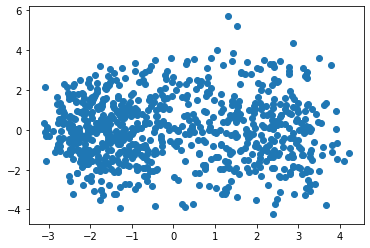

In [ ]:
# get training data and label data
properties = list(data.columns.values)
properties.remove('label')
pro_data = data[properties]
train_label = data['label']
train_data=dataprocessing(pro_data)

Accuracy score of Naive Bayes : 0.743135 (0.042854)
Accuracy score of Logistic Regression : 0.753289 (0.048485)
Accuracy score of Linear Discriminant Analysis : 0.752862 (0.047738)
Accuracy score of Random Forest Classifier : 0.736790 (0.041989)
Accuracy score of Support Vector Machine : 0.749903 (0.048099)
Accuracy score of Multi-layer Perceptron Classifier : 0.716959 (0.049724)
Accuracy score of K-Nearest Neighbors : 0.697517 (0.041633)


Text(0, 0.5, 'Accuracy score')

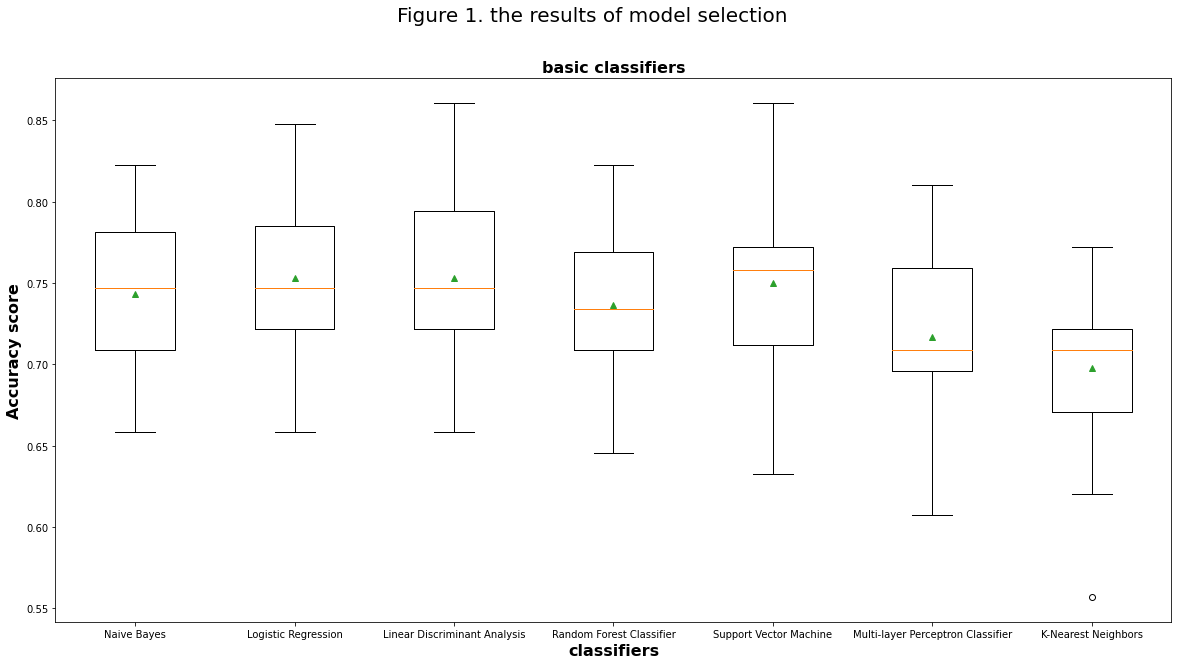

In [ ]:

# test basic classifiers
def get_models():
  models = dict()
  models['Naive Bayes'] =GaussianNB()
  models['Logistic Regression'] = LogisticRegression()
  models['Linear Discriminant Analysis'] = LinearDiscriminantAnalysis()
  models['Random Forest Classifier'] = RandomForestClassifier()
  models['Support Vector Machine'] = SVC(probability=True)
  models['Multi-layer Perceptron Classifier'] = MLPClassifier()
  models['K-Nearest Neighbors'] = KNeighborsClassifier()
  return models


# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, train_data, train_label)
  results.append(scores)
  names.append(name)
  print('Accuracy score of %s : %f (%f)' % (name, mean(scores), std(scores)))
 
# boxplot algorithm comparison
# figure related code

fig = plt.figure(figsize=(20,10))
fig.suptitle('Figure 1. the results of model selection ', fontsize=20)

ax = fig.add_subplot(111)
ax.boxplot(results, labels=names, showmeans=True)

ax.set_title('basic classifiers', fontsize=16, fontweight='bold')
ax.set_xlabel('classifiers', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy score', fontsize=16, fontweight='bold')


In [ ]:
# feature selection with RFE
def get_models():
  models = dict()
  rfe = RFE(estimator=GaussianNB(), n_features_to_select=3)
  model = LogisticRegression()
  models['Naive Bayes'] = Pipeline(steps=[('s',rfe),('m',model)])
  # 
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)
  model = LogisticRegression()
  models['Logistic Regression'] = Pipeline(steps=[('s',rfe),('m',model)])
  # 
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)
  model = estimator=SVC(probability=True)
  models['Support Vector Machine'] = Pipeline(steps=[('s',rfe),('m',model)])
	# 
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)
  model = RandomForestClassifier()
  models['Random Forest Classifier'] = Pipeline(steps=[('s',rfe),('m',model)])
	# 
  rfe = RFE(estimator= LogisticRegression(), n_features_to_select=3)
  model = MLPClassifier()
  models[' Multi-layer Perceptron Classifier'] = Pipeline(steps=[('s',rfe),('m',model)])
  return models



# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, train_data, train_label)
  results.append(scores)
  names.append(name)
  print('Accuracy score of %s : %f (%f)' % (name, mean(scores), std(scores)))

Accuracy score of Naive Bayes : nan (nan)
Accuracy score of Logistic Regression : 0.742719 (0.037677)
Accuracy score of Support Vector Machine : 0.740587 (0.042669)
Accuracy score of Random Forest Classifier : 0.714822 (0.052353)
Accuracy score of  Multi-layer Perceptron Classifier : 0.741870 (0.042548)


In [ ]:
model = LogisticRegression()

param_grid = [
    {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter' : [100,110,120,130,140],
    'dual':[True,False]
    }
]

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search  = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(train_data, train_label)

# summarize results
print("Best Logistic Regression: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Logistic Regression: 0.754549 using {'C': 0.08858667904100823, 'dual': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid=params_NB,cv=cv,verbose=1,scoring='accuracy') 
gs_NB.fit(train_data, train_label)

gs_NB.best_params_

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    5.1s finished


{'var_smoothing': 0.1}

In [ ]:
# define models and parameters
model = MLPClassifier(max_iter=100)
param_grid = [
    { 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
     }
]

# define grid search
grid_search  = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid_search.fit(train_data, train_label)

# summarize results
print("Best MLPClassifier: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best MLPClassifier: 0.759203 using {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
def get_models():
  models = dict()
  models['Naive Bayes2'] =GaussianNB(var_smoothing=0.08111308307896872)
  models['Logistic Regression2'] = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear',max_iter = 100)
  models['Linear Discriminant Analysis'] = LinearDiscriminantAnalysis()
  models['Multi-layer Perceptron Classifier2'] = MLPClassifier(max_iter=100,activation='tanh',alpha= 0.0001,hidden_layer_sizes= (100,),learning_rate='adaptive', solver='adam')
  return models

Accuracy score of Naive Bayes2 : 0.743135 (0.041072)
Accuracy score of Logistic Regression2 : 0.751163 (0.048969)
Accuracy score of Linear Discriminant Analysis : 0.752862 (0.047738)
Accuracy score of Multi-layer Perceptron Classifier2 : 0.753267 (0.045650)


Text(0, 0.5, 'Accuracy score')

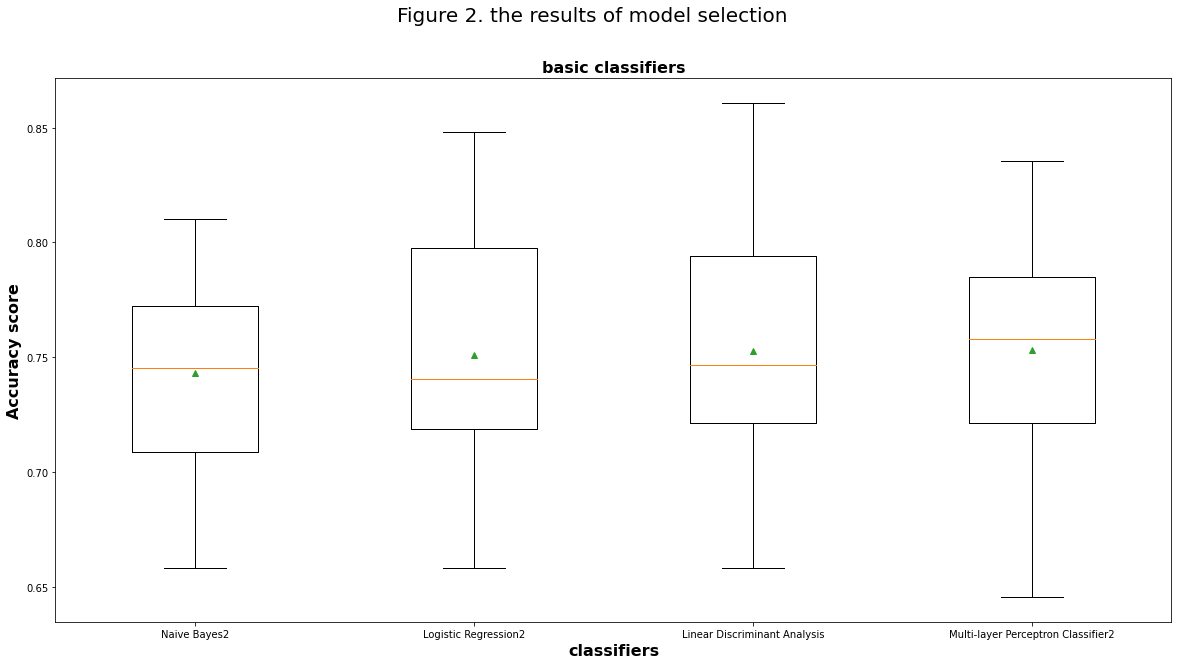

In [ ]:

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, train_data, train_label)
  results.append(scores)
  names.append(name)
  print('Accuracy score of %s : %f (%f)' % (name, mean(scores), std(scores)))
 
# boxplot algorithm comparison
# figure related code

fig = plt.figure(figsize=(20,10))
fig.suptitle('Figure 2. the results of model selection ', fontsize=20)

ax = fig.add_subplot(111)
ax.boxplot(results, labels=names, showmeans=True)

ax.set_title('basic classifiers', fontsize=16, fontweight='bold')
ax.set_xlabel('classifiers', fontsize=16, fontweight='bold')
ax.set_ylabel('Accuracy score', fontsize=16, fontweight='bold')


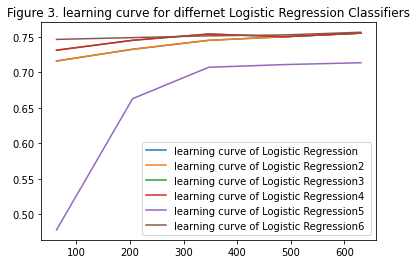

In [ ]:
# test basic classifiers
def get_models():
  models = dict()
  models['Logistic Regression'] = LogisticRegression()
  models['Logistic Regression2'] = LogisticRegression(penalty='l2')
  models['Logistic Regression3'] = LogisticRegression(penalty='l2',C=0.012742749857031334)
  models['Logistic Regression4'] = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='newton-cg')
  models['Logistic Regression5'] = LogisticRegression(penalty='l1',C=0.012742749857031334,solver='liblinear')
  models['Logistic Regression6'] = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear')
  return models


# get the models to evaluate
models = get_models()

for name, model in models.items():
    (train_sizes,
     train_scores,
     test_scores) = learning_curve(model, train_data, train_label, cv=5)
    test_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, test_mean, label='learning curve of %s ' % (name))

plt.title("Figure 3. learning curve for differnet Logistic Regression Classifiers")
plt.legend()
plt.show()

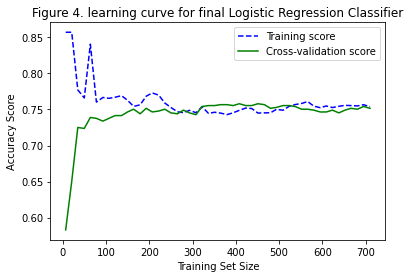

In [ ]:
# draw learning curve for logistic regression
model=LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear',max_iter = 100)

# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(model, train_data, train_label, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("Figure 4. learning curve for final Logistic Regression Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

In [ ]:
test=pd.read_csv('/content/drive/My Drive/FML_Assignment/test.csv')

In [ ]:
test

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,CNNs.10,CNNs.11,CNNs.12,CNNs.13,CNNs.14,CNNs.15,CNNs.16,CNNs.17,CNNs.18,CNNs.19,CNNs.20,CNNs.21,CNNs.22,CNNs.23,CNNs.24,CNNs.25,CNNs.26,CNNs.27,CNNs.28,CNNs.29,CNNs.30,CNNs.31,CNNs.32,CNNs.33,CNNs.34,CNNs.35,CNNs.36,CNNs.37,CNNs.38,CNNs.39,...,GIST.472,GIST.473,GIST.474,GIST.475,GIST.476,GIST.477,GIST.478,GIST.479,GIST.480,GIST.481,GIST.482,GIST.483,GIST.484,GIST.485,GIST.486,GIST.487,GIST.488,GIST.489,GIST.490,GIST.491,GIST.492,GIST.493,GIST.494,GIST.495,GIST.496,GIST.497,GIST.498,GIST.499,GIST.500,GIST.501,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.00000,0.00000,0.00000,0.641460,0.00000,0.010263,0.00000,0.00000,0.00000,NaN,0.000000,0.00000,NaN,NaN,1.09380,0.67192,0.00000,0.0000,NaN,NaN,0.00000,NaN,NaN,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.146000,NaN,0.00000,0.23594,NaN,0.000000,0.023848,0.410790,NaN,0.000000,0.0,...,0.004334,0.006872,0.007383,0.023129,0.015715,0.014801,0.005751,0.018266,NaN,0.027327,0.015378,0.018204,NaN,0.006307,NaN,0.050680,0.003120,0.005427,NaN,0.083366,0.013520,0.014224,0.013778,NaN,0.024670,NaN,0.020640,0.019328,NaN,0.048529,0.013987,0.009278,0.011328,0.010538,NaN,0.013829,0.052630,0.035465,NaN,0.058088
1,0.00000,0.78386,0.00000,0.008242,NaN,0.783720,1.26100,0.00000,NaN,0.000000,NaN,0.00000,NaN,0.83732,0.28559,0.37439,0.34635,0.0000,0.000000,0.00000,0.59925,0.0,0.63904,0.00000,0.000000,NaN,NaN,0.00000,0.00000,0.000000,NaN,NaN,0.00000,0.00000,0.004064,0.000000,NaN,0.000000,NaN,0.0,...,0.017208,0.024160,0.043782,0.029639,0.037706,0.025978,NaN,0.045894,0.027285,0.012793,0.021836,0.024630,0.007313,0.011662,0.012753,0.030091,NaN,NaN,0.017599,0.049867,0.011505,NaN,0.020126,0.015193,0.019641,0.112840,0.147830,0.033717,0.020202,0.022431,0.047402,0.015783,0.008880,0.026375,0.044499,NaN,0.032760,0.019160,0.042316,0.014976
2,0.38465,0.00000,0.00000,0.000000,0.70955,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,0.80505,0.0000,0.00000,0.00000,NaN,0.00000,0.0000,0.000000,0.00000,NaN,NaN,0.00000,1.14640,0.000000,0.73152,0.00000,0.00000,0.00000,NaN,NaN,0.00000,0.00000,0.00000,NaN,0.000000,0.000000,0.000000,NaN,NaN,...,0.026901,NaN,0.029906,0.013477,NaN,0.026310,0.024671,0.051806,NaN,NaN,NaN,NaN,NaN,0.018258,0.028155,0.015256,0.028930,0.020556,NaN,0.035673,0.018933,0.054751,0.029442,NaN,0.025339,NaN,NaN,0.033817,0.033160,0.020813,NaN,0.008986,0.017565,0.026905,0.014389,0.022969,0.027598,NaN,0.024075,0.031379
3,0.00000,0.71303,0.00000,0.571850,0.20295,0.000000,0.18072,0.00000,0.00000,0.323420,0.028327,0.64687,0.0000,0.00000,0.03384,0.00000,NaN,0.0000,0.045159,0.13076,NaN,NaN,0.00000,0.00000,0.190680,0.00000,NaN,0.50899,NaN,0.000000,NaN,0.00000,0.24303,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,...,0.016763,0.030263,NaN,0.020161,0.003834,0.011930,0.005787,0.013193,NaN,0.018324,0.001617,0.039116,0.024671,NaN,NaN,0.017718,0.001878,0.013104,0.010996,NaN,0.011977,0.018151,0.024082,0.026165,0.020368,0.031549,NaN,0.026506,0.005279,NaN,0.028113,0.035376,0.001820,0.003180,0.016161,0.000948,0.022530,0.013404,0.022238,0.039642
4,NaN,0.50370,NaN,NaN,0.00000,0.000000,NaN,0.47737,0.43069,0.000000,0.000000,0.00000,NaN,0.00000,0.00000,0.24137,NaN,0.5146,0.000000,0.00000,0.87694,0.0,0.81024,0.00000,0.000000,0.76022,1.27470,0.00000,NaN,NaN,0.0,0.00000,NaN,0.00000,0.000000,0.000000,0.410130,0.000000,0.000000,0.0,...,0.016372,0.013736,0.023753,0.036873,0.078999,NaN,0.014637,0.026880,0.013466,0.084849,0.055964,0.007813,0.028473,0.007077,NaN,0.024678,0.032560,0.013846,NaN,0.054825,0.035741,0.029675,NaN,NaN,0.042840,0.024686,0.030309,0.043754,NaN,0.013753,0.016204,0.006194,0.007046,0.027577,0.023283,0.011591,0.086180,0.023861,0.040862,0.021848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

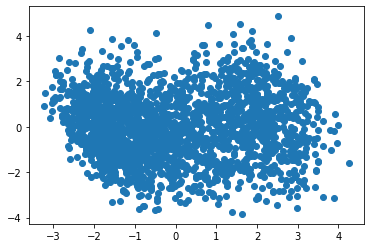

In [ ]:
test_data=dataprocessing(test)
# fit final model
model=LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear',max_iter = 100)
model.fit(train_data,train_label)
predictions = model.predict(test_data)

In [ ]:
predictions
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')
from google.colab import files
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
param_grid = {'n_estimators': [10, 50, 100, 500],
 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
 }

# define grid search
grid_search  = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=5, scoring='accuracy')
grid_result = grid_search.fit(train_data, train_label)

# summarize results
print("Best AdaBoostClassifier: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best AdaBoostClassifier: 0.749069 using {'learning_rate': 0.1, 'n_estimators': 100}


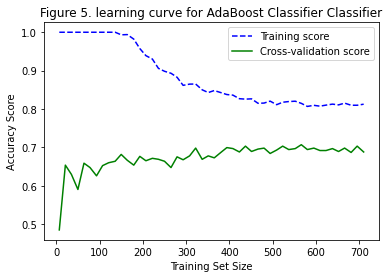

In [38]:
from sklearn.model_selection import learning_curve
  
modelmodel = AdaBoostClassifier(learning_rate=0.1,n_estimators= 100)
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(model, train_data, train_label, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("Figure 5. learning curve for AdaBoost Classifier Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()

accuracy score of test data without low confidence: 0.751163 
accuracy score of test data include low confidence : 0.750741 


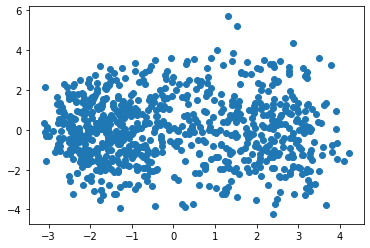

In [51]:
# test data include low confidence
data2=training2
# get training data and label data
properties2 = list(data.columns.values)
properties2.remove('label')
pro_data2 = data2[properties]
train_label2 = data2['label']
train_data2=dataprocessing(pro_data2)

# get the models to evaluate
model = LogisticRegression(penalty='l2',C=0.012742749857031334,solver='liblinear',max_iter = 100)
# evaluate the models and store results
scores = evaluate_model(model, train_data, train_label)
scores2 = evaluate_model(model, train_data2, train_label2)
print('accuracy score of test data without low confidence: %f ' % (mean(scores)))
print('accuracy score of test data include low confidence : %f ' % (mean(scores2)))